In [13]:
#!pip install tavily-python==0.3.3 duckduckgo-search==6.1.6




/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


# Lesson 3: Agentic Search

In [1]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

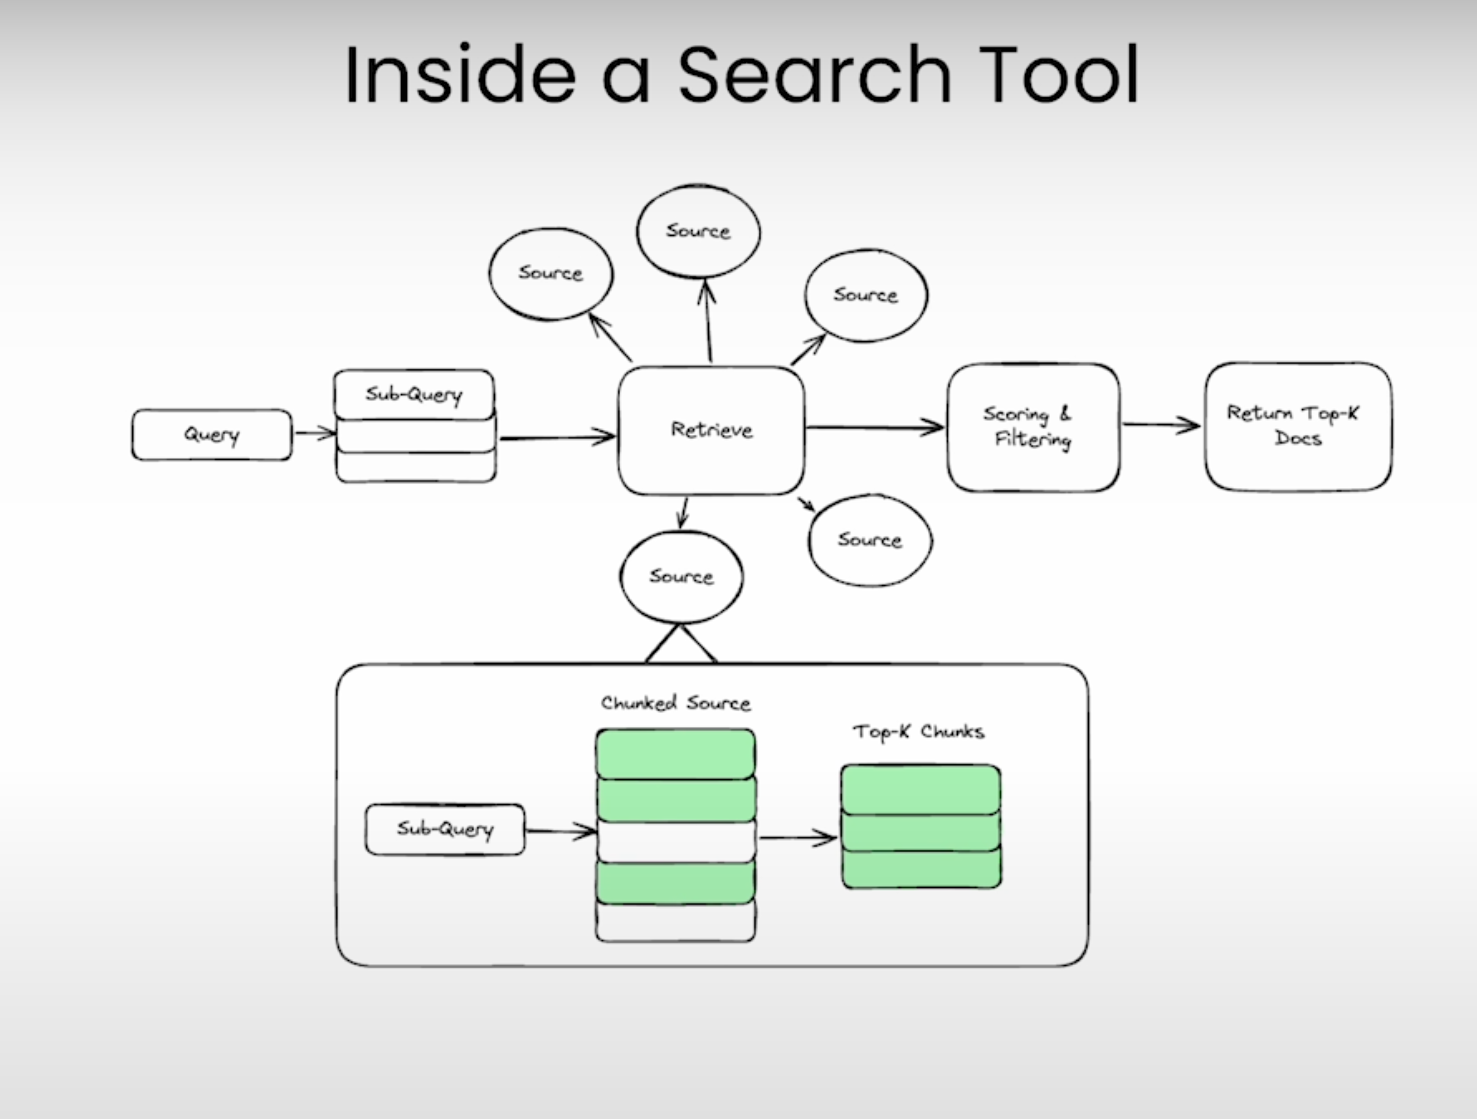

In [2]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]


"The new Nvidia Blackwell GPU, specifically the Blackwell B200 model, is part of Nvidia's latest GPU architecture set to power the RTX 50-series graphics cards. It features the GB202 and GB203 models, offering 12*8 512-bit GDDR7 and 7*6 256-bit configurations respectively. The Blackwell platform aims to enable organizations to build and run real-time generative AI on trillion-parameter large language models at significantly reduced cost and energy consumption compared to its predecessor."

## Regular search

In [3]:
# choose location (try to change to your own city!)

city = "Southwark, London"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [12]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  


for i in search(query):
    print(i)

https://weather.com/en-GB/weather/today/l/7517a52d4d1815e639ae1001edb8c5fda2264ea579095b0f28f55c059599e074
https://weather.com/en-GB/weather/tenday/l/7bc0022212d6873b8226ac81bad9714bc956aef8851519b045d7750eb3ea4745
https://weather.com/weather/hourbyhour/l/London+England+United+Kingdom?canonicalCityId=805c6df1c2518951d4dffa28cf6e483358644c3131109dff6c9a8a2c265fbc67
https://weather.com/weather/today/l/Pimlico+England+United+Kingdom?canonicalCityId=a4cb96aeab4c5bbc8f739c9195747c0abd46dbe68a101384f78303da71c0f417
https://weather.com/


In [13]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

In [14]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

Website: https://weather.com/en-GB/weather/today/l/7517a52d4d1815e639ae1001edb8c5fda2264ea579095b0f28f55c059599e074


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--3kKUE gradients--rainyDay--2G79Q gradients--rainyDay-top--1FlOb" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--2kcLJ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--1dWzA BaseAd--card--2G19u BaseAd--hide--3LkRr"><div class="adLabel BaseAd--adLabel--1LMu9">Advertisement</div><div class="ad_module BaseAd--ad_module--DeGCt subs-undefined BaseAd--placeholder--3IQan" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-fe926b10-58bc-448a-ab09-47e

In [15]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/en-GB/weather/today/l/7517a52d4d1815e639ae1001edb8c5fda2264ea579095b0f28f55c059599e074


recents Special Forecasts London, England Rain Rain to end by 3 pm. More possible later. Today's Forecast for London, England Morning Afternoon Evening Overnight Weather Today in London, England 4:42 21:19 Hourly Forecast Now 13:00 14:00 15:00 16:00 Daily Forecast Today Sun 16 Mon 17 Tue 18 Wed 19 Air Quality Index Enjoy your usual outdoor activities. Health & Activities Seasonal Allergies and Pollen Count Forecast Grass pollen is high in your area We recognise our responsibility to use data and technology for good. We may use or share your data with our data vendors. Take control of your data. © The Weather Company, LLC 2024


## Agentic Search

In [16]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'Peckham', 'region': 'Southwark, Greater London', 'country': 'United Kingdom', 'lat': 51.47, 'lon': -0.06, 'tz_id': 'Europe/London', 'localtime_epoch': 1718450216, 'localtime': '2024-06-15 12:16'}, 'current': {'last_updated_epoch': 1718450100, 'last_updated': '2024-06-15 12:15', 'temp_c': 16.4, 'temp_f': 61.5, 'is_day': 1, 'condition': {'text': 'Patchy rain nearby', 'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png', 'code': 1063}, 'wind_mph': 15.9, 'wind_kph': 25.6, 'wind_degree': 236, 'wind_dir': 'WSW', 'pressure_mb': 998.0, 'pressure_in': 29.48, 'precip_mm': 0.56, 'precip_in': 0.02, 'humidity': 74, 'cloud': 89, 'feelslike_c': 16.4, 'feelslike_f': 61.5, 'windchill_c': 16.4, 'windchill_f': 61.5, 'heatindex_c': 16.4, 'heatindex_f': 61.5, 'dewpoint_c': 11.8, 'dewpoint_f': 53.3, 'vis_km': 9.0, 'vis_miles': 5.0, 'uv': 4.0, 'gust_mph': 23.1, 'gust_kph': 37.2}}


In [17]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)


{
    "location": {
        "name": "Peckham",
        "region": "Southwark, Greater London",
        "country": "United Kingdom",
        "lat": 51.47,
        "lon": -0.06,
        "tz_id": "Europe/London",
        "localtime_epoch": 1718450216,
        "localtime": "2024-06-15 12:16"
    },
    "current": {
        "last_updated_epoch": 1718450100,
        "last_updated": "2024-06-15 12:15",
        "temp_c": 16.4,
        "temp_f": 61.5,
        "is_day": 1,
        "condition": {
            "text": "Patchy rain nearby",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/176.png",
            "code": 1063
        },
        "wind_mph": 15.9,
        "wind_kph": 25.6,
        "wind_degree": 236,
        "wind_dir": "WSW",
        "pressure_mb": 998.0,
        "pressure_in": 29.48,
        "precip_mm": 0.56,
        "precip_in": 0.02,
        "humidity": 74,
        "cloud": 89,
        "feelslike_c": 16.4,
        "feelslike_f": 61.5,
        "windchill_c": 16.4,
        "

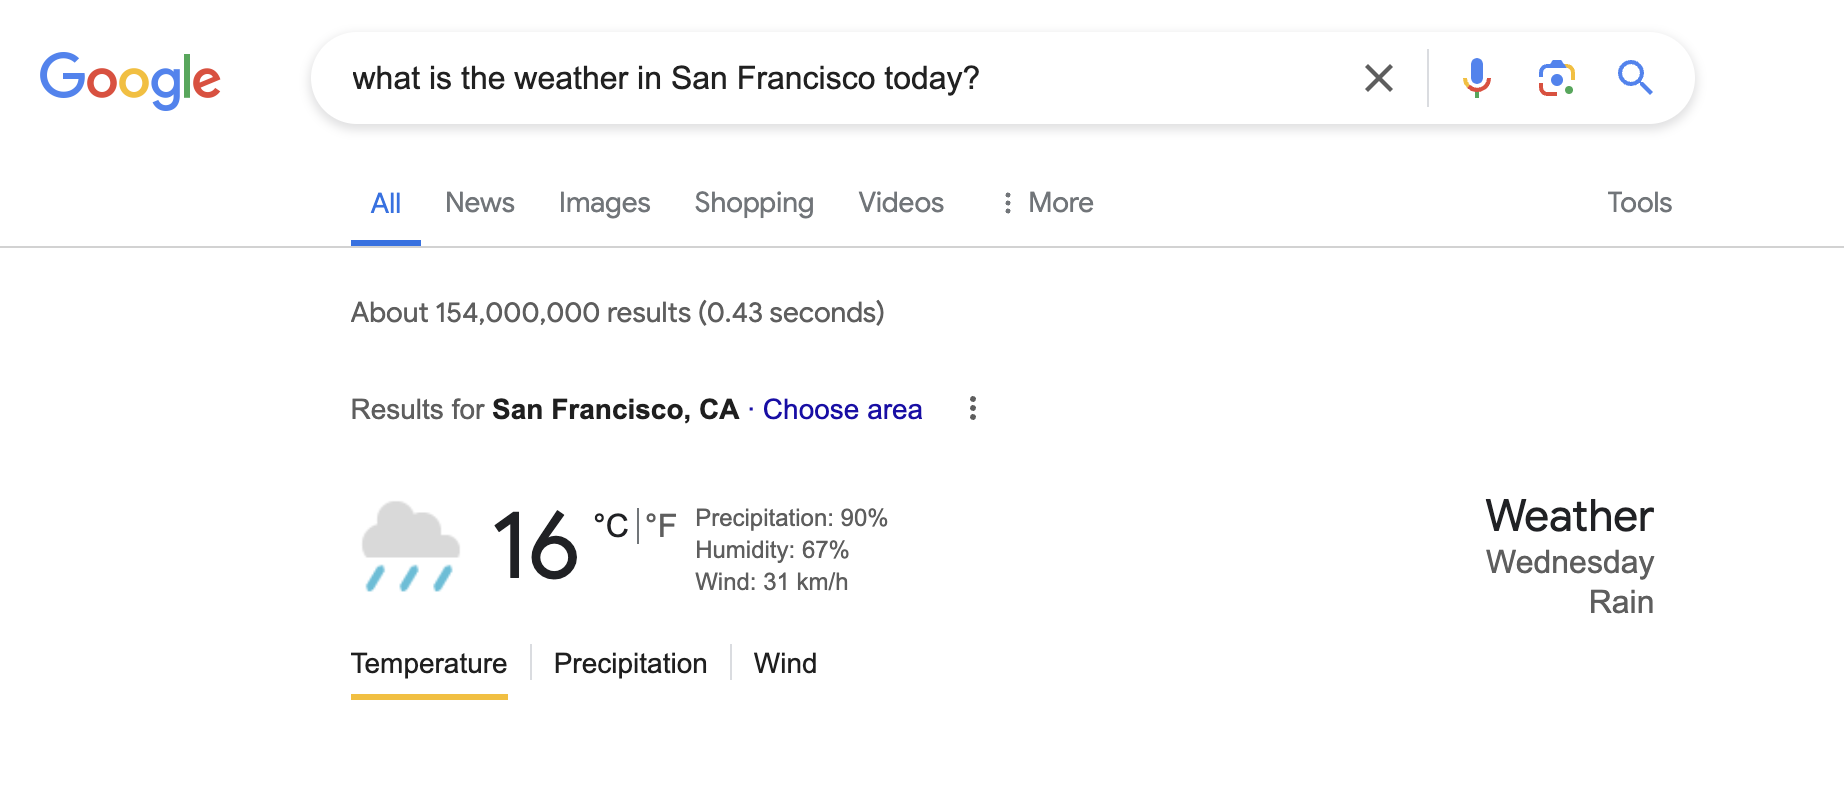
